In [11]:
from sage.rings.polynomial.cyclotomic import cyclotomic_coeffs
#sampling https://doc.sagemath.org/html/en/reference/stats/sage/stats/distributions/discrete_gaussian_polynomial.html
from sage.stats.distributions.discrete_gaussian_polynomial import DiscreteGaussianDistributionPolynomialSampler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline

def gaussian(sigma, truncation, no_of_values):
    new_error = []
    org_error = []
    check_sign = 0
    count = 0
    gb = DiscreteGaussianDistributionPolynomialSampler(ZZ['x'], 1, sigma)

    for num in range(no_of_values): #1000000
        error = int(gb())
        if(error<0):
            check_sign = -1
        else:
            check_sign = 1
            
        if (truncation == 1):
            error_trunc = abs(error) & 0b01111 #5 bits to 4 bits - max val 15
        elif (truncation == 2):
            error_trunc = abs(error) & 0b00111 #5 bits to 3 bits - max val 7
        elif (truncation == 3):
            error_trunc = abs(error) & 0b00011 #5 bits to 2 bits - max val 3
        else:
            return
            
        if(error_trunc != abs(error)):
            count = count+1
        new_error.append(check_sign*error_trunc)
        org_error.append(error)
        
    return org_error, new_error, count

def plot_hist(org, new, t, sigma):
    plt.hist(new,alpha=0.5, label='Truncated, T = '+str(t), density = True )
    plt.hist(org,alpha=0.5, label='Original, \u03C3 = '+str(round(sigma, 2)), density = True )
    plt.legend(loc='upper right')
    plt.show
    
def changes_in_sigma(org, new):
    new_0 = new.count(0)
    old_0 = org.count(0)

    print('Percentage of 0 increase:'+str(round(((new_0-old_0)/old_0)*100, 2)))
    print('Percentage of 0 in original:'+str(round((old_0/1000000)*100, 2)))
    print('Percentage of 0 in truncated:'+str(round((new_0/1000000)*100, 2)))
    print('Mean of Trunc:' +str(round(mean(new), 5)))
    print('Sigma of Trunc:' + str(round(np.sqrt(np.var(new)), 2)))


Percentage of 0 increase:0.0
Percentage of 0 in original:11.96
Percentage of 0 in truncated:11.96
Mean of Trunc:0.00203
Sigma of Trunc:3.33


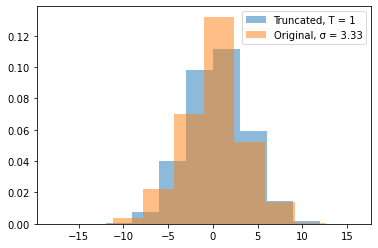

In [12]:
##3.33
T1_original, T1_truncated, T1_no_trunc = gaussian(3.33, 1, 1000000)
plot_hist(T1_original, T1_truncated, 1, 3.33)
changes_in_sigma(T1_original, T1_truncated)

Percentage of 0 increase:11.08
Percentage of 0 in original:12.04
Percentage of 0 in truncated:13.37
Mean of Trunc:-0.00229
Sigma of Trunc:3.05


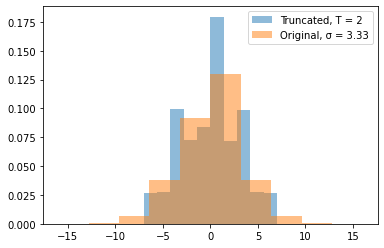

In [14]:
T2_original, T2_truncated, T2_no_trunc = gaussian(3.33, 2, 1000000)
plot_hist(T2_original, T2_truncated, 2, 3.33)
changes_in_sigma(T2_original, T2_truncated)

Percentage of 0 increase:109.22
Percentage of 0 in original:11.96
Percentage of 0 in truncated:25.03
Mean of Trunc:-0.00055
Sigma of Trunc:1.73


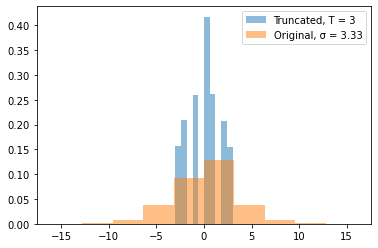

In [16]:
T3_original, T3_truncated, T3_no_trunc = gaussian(3.33, 3, 1000000)
plot_hist(T3_original, T3_truncated, 3, 3.33)
changes_in_sigma(T3_original, T3_truncated)

Percentage of 0 increase:0.35
Percentage of 0 in original:8.83
Percentage of 0 in truncated:8.86
Mean of Trunc:0.00688
Sigma of Trunc:4.49


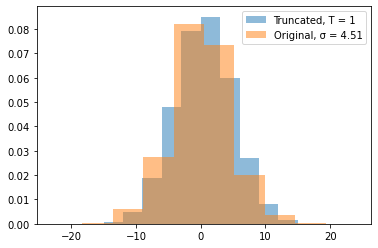

In [17]:
##4.51
T1_original_2, T1_truncated_2, T1_no_trunc_2 = gaussian(4.51, 1, 1000000)
plot_hist(T1_original_2, T1_truncated_2, 1, 4.51)
changes_in_sigma(T1_original_2, T1_truncated_2)

Percentage of 0 increase:41.74
Percentage of 0 in original:8.84
Percentage of 0 in truncated:12.52
Mean of Trunc:-0.00122
Sigma of Trunc:3.47


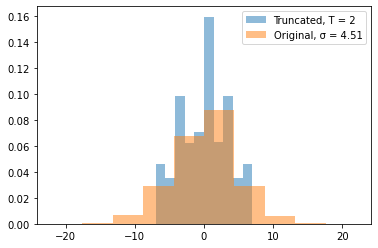

In [23]:
T2_original_2, T2_truncated_2, T2_no_trunc_2 = gaussian(4.51, 2, 1000000)
plot_hist(T2_original_2, T2_truncated_2, 2, 4.51)
changes_in_sigma(T2_original_2, T2_truncated_2)

Percentage of 0 increase:182.74
Percentage of 0 in original:8.84
Percentage of 0 in truncated:24.99
Mean of Trunc:0.00115
Sigma of Trunc:1.77


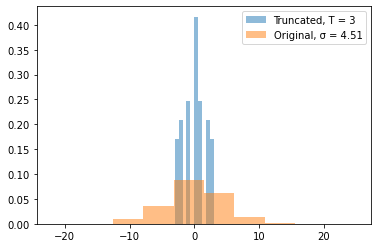

In [22]:
T3_original_2, T3_truncated_2, T3_no_trunc_2 = gaussian(4.51, 3, 1000000)
plot_hist(T3_original_2, T3_truncated_2, 3, 4.51)
changes_in_sigma(T3_original_2, T3_truncated_2)

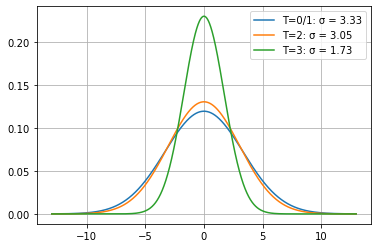

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline

x = np.linspace(-13, 13, 10000)
plt.plot(x,norm.pdf(x, 0, 3.33), label="T=0/1: \u03C3 = 3.33")
plt.plot(x,norm.pdf(x, 0, 3.05), label="T=2: \u03C3 = 3.05")
plt.plot(x,norm.pdf(x, 0, 1.73), label="T=3: \u03C3 = 1.73")

plt.grid()
plt.legend()
plt.show()

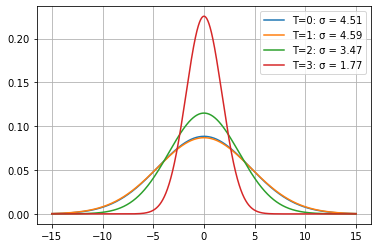

In [11]:
x = np.linspace(-15, 15, 10000)
plt.plot(x,norm.pdf(x, 0, 4.51), label="T=0: \u03C3 = 4.51")
plt.plot(x,norm.pdf(x, 0, 4.59), label="T=1: \u03C3 = 4.59")
plt.plot(x,norm.pdf(x, 0, 3.47), label="T=2: \u03C3 = 3.47")
plt.plot(x,norm.pdf(x, 0, 1.77), label="T=3: \u03C3 = 1.77")

plt.grid()
plt.legend()
plt.show()